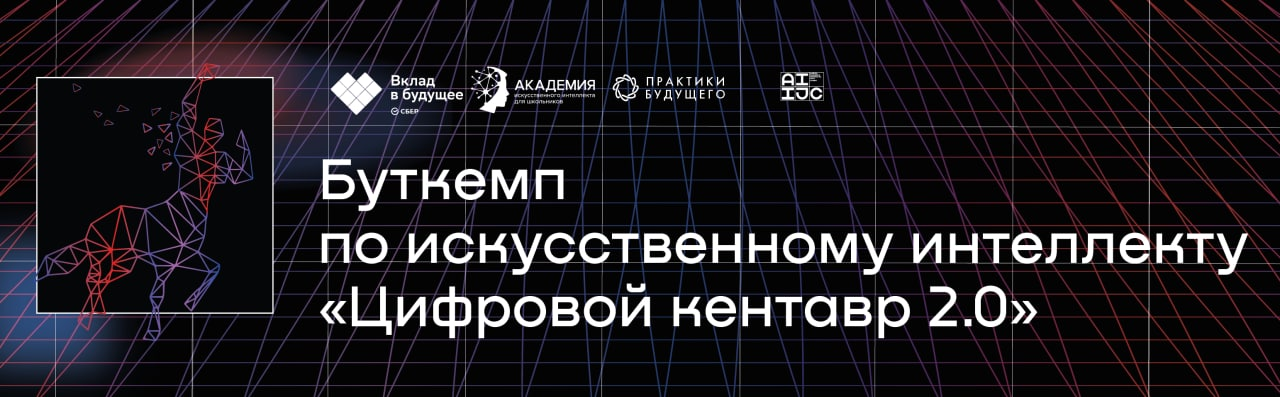

# Работа с библиотекой Sklearn. 

На этой практике мы вспомним основные моменты работы с бибилотекой Pandas, познакомимся с бибилотекой sklearn и поучаствуем в первом соревновании по машинному обучению. Ссылка на само соревнование:
https://www.kaggle.com/c/titanic

Библиотека scikit-learn де факто наиболее популярный, разносторонний, хорошо документированный и постоянно обогащающийся инструмент для построения моделей машинного обучения.

## Скачивание данных

Для начала, работая с данными с платформы Kaggle, нам необходимо их скачать. Вы можете как и загрузить данные с платформы, загрузив их на Google Colab, так и скачать их сразу. Сейчас мы сделаем второе, хоть и выглядит это сложнее.

In [1]:
! pip install kaggle

     |████████████████████████████████| 58 kB 168 kB/s eta 0:00:01
     |████████████████████████████████| 62 kB 230 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 385 kB/s eta 0:00:01
     |████████████████████████████████| 138 kB 240 kB/s eta 0:00:01
     |████████████████████████████████| 78 kB 763 kB/s eta 0:00:01
     |████████████████████████████████| 61 kB 545 kB/s eta 0:00:01
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73049 sha256=6d2864d6bfa9c5f166e316ea1bdc7c7267fa115eaf9b8c5ad28d7557c6b346c9
  Stored in directory: /home/elena/.cache/pip/wheels/ac/b2/c3/fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [7]:
! mkdir ~/.kaggle

mkdir: невозможно создать каталог «/home/elena/.kaggle»: Файл существует


Не забываем, что здесь нам необходимо взять файл kaggle.json из своего аккаунта!

In [11]:
! cp kaggle.json ~/.kaggle/

In [12]:
! chmod 600 ~/.kaggle/kaggle.json

Эту строчку можно скопировать из самого соревнования.

In [13]:
!kaggle competitions download -c titanic

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 1.41MB/s]


In [15]:
! unzip "titanic.zip"

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


## Предобработка тренировочных данных

Предобработка данных - то, на что мы сейчас сделаем фокус. Посмотрев на данные, мы можем сформулировать гипотезы о том, как нам лучше подойти к нашей задаче, а также мы можем значительно улучить качество итогового результата. Большое количество пробелов, выбросы (аномально высокие или низкие значения), несбалансированность - это то, что всегда ухудшает итоговый результат. Или даже делает невозможным использовать машинное обучение.

Мы импортируем библиотеки для визаулизации данных и работы с таблицами. Pandas - наш лучший "друг" для предобработки.

In [1]:
import numpy as np
import pandas as pd

Посмотрим на наши данные. Обратим внимание на то, какие у нас здесь есть фичи. Обратим также внимание на то, где у нас данные числовые, а где - нет.

In [2]:
df = pd.read_csv("train.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Работая с данными, мы можем сразу разделить их на то, на чём мы будем учить нашу модель и то, к чему мы будем стремиться. Разделим датасет на признаки и целевую переменную.

In [3]:
y = df['Survived']
data = df.drop(columns=['Survived'])

Проверим, что у нас всё верно. Посмотрим на переменную 'data', в которую мы записали все признаки.

Мы можем посмотреть как и начало...

In [4]:
data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


... так и конец.

In [5]:
data.tail(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Работая с данными, мы должны работать не только с Pandas, но и хорошо понимать особенности самих данных. Например, как вы считаете, будут ли влиять ID, имя, номер билета и номер каюты на то, выживет ли пасажир? При этом помните, что пол и класс обслуживания у нас есть в отдельных переменных. Все ли фичи дадут нам уникальную и полезную информацию?

In [6]:
data = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
5,3,male,NaN,0,0,8.4583,Q
6,1,male,54.0,0,0,51.8625,S
7,3,male,2.0,3,1,21.0750,S
8,3,female,27.0,0,2,11.1333,S
9,2,female,14.0,1,0,30.0708,C


Здесь я предполагаю, что некоторые фичи лишние, и их можно удалить. Но это лишь гипотеза! Вы можете попробовать что-то оставить, а, может, удалить что-то дополинтельно. Не ограничивайте себя.

Давайте посмотрим ифнормацию о данных. Особое внимание надо обратить на типы данных и на то, нет ли в какой-то фиче большого количества пропусков?

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 48.9+ KB


Мы видим, что в поле "возраст" у нас очень много пропусков. Нам необходимо их заполнить. Давайте попробуем, например, заполнить все пропуски в возрасте значением ноль. Заполним пропуски в колонках Age и Embarked:

In [8]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [9]:
fill_value = np.mean(data['Age'])
data['Age'] = data['Age'].fillna(fill_value)

С 'Embarked' несколько сложнее. Это не числовой признак, поэтому просто нулями заполнить всё нельзя. Посмотрим соотношения классов в фиче.

In [10]:
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Больше всего значений у нас в классе 'S'. Самым простым решением у нас будет заполнить все пропуски этим значением.

In [12]:
data['Embarked'] = data['Embarked'].fillna('S')

Проверим то, что у нас получилось.

In [13]:
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
5,3,male,29.699118,0,0,8.4583,Q
6,1,male,54.000000,0,0,51.8625,S
7,3,male,2.000000,3,1,21.0750,S
8,3,female,27.000000,0,2,11.1333,S
9,2,female,14.000000,1,0,30.0708,C


**Задание**

Можете попробовать заполнить возраст не нулями, а средним арифметическим возраста пассажиров.

Пол у нас сейчас записан словами, но, работая с данными, желательно как можно больше значений кодировать. Пол мы, например, можем условно принять за 0 и 1.

In [14]:
sex_dict = {
    'female': 0,
    'male': 1
}

data['Sex'] = list(map(lambda x: sex_dict[x], data['Sex']))

# for i in range(len(data)):
#   data['Sex'][i] = sex_dict[data['Sex'][i]]

# map() — это встроенная функция Python, принимающая в качестве аргумента функцию и последовательность. 
# Она работает так, что применяет переданную функцию к каждому элементу.

# Обратите внимание на то, что в Python3 функция map возвращает объект Map, а в Python2 — список.
# Поэтому пишем list

# sex_dict['female'] = 0
# sex_dict['male'] = 1
# data['Sex'] - список из female и male, поэтому по итогу превратится в 0 и 1

Посмотрим на результат.

In [15]:
data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,S
1,1,0,38.000000,1,0,71.2833,C
2,3,0,26.000000,0,0,7.9250,S
3,1,0,35.000000,1,0,53.1000,S
4,3,1,35.000000,0,0,8.0500,S
5,3,1,29.699118,0,0,8.4583,Q
6,1,1,54.000000,0,0,51.8625,S
7,3,1,2.000000,3,1,21.0750,S
8,3,0,27.000000,0,2,11.1333,S
9,2,0,14.000000,1,0,30.0708,C


Есть более сложный (но только по иснтрументам!) метод закодировать значения фичей. Его опробуем на классах обслуживания.

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(data['Embarked']) # здесь(в le) хранится словарь закодированных значений
data['Embarked'] = le.transform(data['Embarked'])

data.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.000000,1,0,7.2500,2
1,1,0,38.000000,1,0,71.2833,0
2,3,0,26.000000,0,0,7.9250,2
3,1,0,35.000000,1,0,53.1000,2
4,3,1,35.000000,0,0,8.0500,2
5,3,1,29.699118,0,0,8.4583,1
6,1,1,54.000000,0,0,51.8625,2
7,3,1,2.000000,3,1,21.0750,2
8,3,0,27.000000,0,2,11.1333,2
9,2,0,14.000000,1,0,30.0708,0


In [17]:
le.classes_

array(['C', 'Q', 'S'], dtype=object)

С корреляцией подробнее вы познакомитесь несколько позже. Если кратко, то благодаря этой функции вы сможете понять, насколько взаимосвязанаы две фичи между собой. (Корреляция Пирсона)

In [18]:
data.corr()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Pclass,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


! Для линейных моделей лучше убирать сильно коррелирующие фичи

## Обучаем модель машинного обучения

Наконец мы переходим к обучению модели! Но прежде нам нужно ответить на несколько важных вопросов. Надо понять, что хочется получить в результате работы и какую именно задачу машинного обучения мы решаем?


### Метрики качества



Выбор метрики. Поговорим об оценке будущего результата. Нельзя сказать, хороший мы получили результат или плохой до тех пор, пока не измерили его по каким-то параметрам. Для получения оценки результатов мы будем использовать различные метрики. 

Метрики — это специальные числовые показатели, по которым мы можем оценить результат машинного обучения. Определи заранее, как будешь измерять результат, по каким параметрам. Разные задачи — разные метрики.

Существует целое множество различных метрик и выбор зависит от целей и специфики задачи. В нашем случае мы решаем задачу бинарной классификации, поэтому метрики нам нужны именно для классификации. Все популярные метрики качества можно найти в библиотеке sklearn в модуле metrics.

https://scikit-learn.org/stable/modules/model_evaluation.html

In [19]:
# метрики для задачи классификации
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Выбор модели

Здесь мы переходим к выбору модели и её обучению.

Модель МО — программа, которая по заданным входным данным выдаёт прогноз. Модель — это не реальность, а её приближение. Моделей много, они очень разные. У каждой есть свои преимущества, недостатки и уникальные особенности.

На следующих занятиях мы более подробно познакомимся с основными классами моделей машинного обучения. А на этом занятии мы только научимся работать с интерфейсом библиотки sklearn для быстрого обучения и выбора моделй.

Для каждого класса моделей в библиотеке sklearn предназначен свой модуль.

Например модели на основе ближайших соседей можно импортировать из модуля [sklearn.neighbors](https://scikit-learn.org/stable/modules/neighbors.html).

Линейные модели, такие как Линейная регрессия и Логистическая регрессия, хранятся в модуле [sklearn.linear_model](https://scikit-learn.org/stable/modules/linear_model.html)

Модели на основе решающих деревьев можно найти в модуле [sklearn.tree](https://scikit-learn.org/stable/modules/tree.html), а ансамбли моделей [sklearn.ensemble](https://scikit-learn.org/stable/modules/ensemble.html)

In [20]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

Еще один важный модуль это [sklearn.model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection).

Он поможет нам разделить данные на выборки для обучения и тестирования, провести кросс-валидацию и найти оптимальные гиперпараметры.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

### Валидация результатов

Валидация модели — это проверка соответствия предсказанных моделью данных по уже известным правильным ответам. Валидация проходит **во время и после обучения** модели. Для этого подготовленные данные обычно разделяют на две части: на обучающую и валидационную выборки. **Обучающая выборка** — это обычно большая часть датасета (около 70%), именно на этих данных обучается модель. **Валидационная выборка** — это оставшаяся часть подготовленного набора данных, которую мы используем, чтобы тестировать обученную модель. Для оценки результатов валидации используется метрика, которую мы выбрали в первом шаге. Этот вид тестирования помогает понять, решает ли модель поставленные задачи. 

Кросс-валидация — это прием, при котором обучающая выборка делится на несколько блоков. На каждой итерации обучения один из блоков используется для проверки, а все остальные — для обучения. Для каждой итерации мы используем новый проверочный блок.

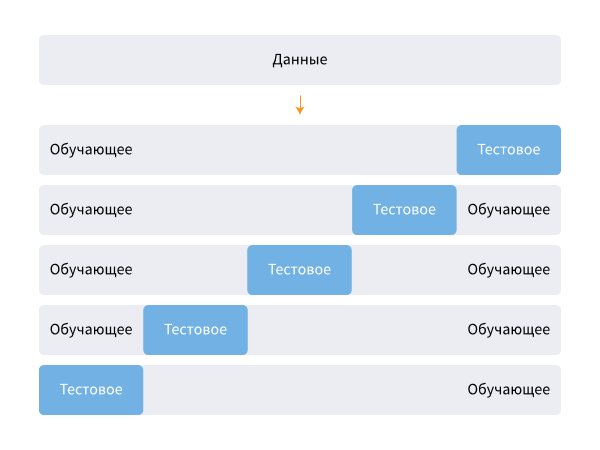

### KNN

In [22]:
knn = KNeighborsClassifier(n_neighbors=5) # модель будет смотреть на пять ближайших соседей

knn.fit(data, y)
knn_preds = knn.predict(data) # предсказываем пока на обучающей выборке, поэтому метрика будет
# показывать не самые честные результаты, в отличии от кросс-валидации (средняя метрика всех тестовых
# выборок по всем фолдам)
knn_preds_proba = knn.predict_proba(data)[:, 1] # матрица вероятности выжил/не выжил 891х2, 
# где в первом столбце вероятность того, что человек выжил, вторая - что не выжил. Берем 2-й столбец
# такая матрица нужна, потому что по умолчанию алгоритмы считают, что при вероятности 0.5 и выше
# автоматически принимается ответ да, но это не всегда так + для расчета метрики roc_auc

print('accuracy', accuracy_score(y, knn_preds)) # От 0 до 1. 1 - угадала все, 0 
print('roc_auc', roc_auc_score(y, knn_preds_proba)) # рок аук используется для
# бинарной классификации. Для многоклассовой классификации тоже можно использовать, 
# но с некоторыми хитростями. Важно знать диапазон - от 0 до 1. 
# Но если меньше 0.5 - модель предсказывает хуже случайной выборки

accuracy 0.8114478114478114
roc_auc 0.88775977588172


In [23]:
knn_preds[:20]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [24]:
knn_preds_proba[:20]

array([0. , 0.6, 0.6, 0.8, 0. , 0.2, 0.4, 0.6, 0.6, 0.4, 1. , 0.2, 0. ,
       0.2, 0.6, 0.2, 0.2, 0.4, 0.4, 0.4])

In [25]:
# Для сравнения со случайной выборкой найдем среднее по у
y.mean()

0.3838383838383838

То есть в среднем выживали в 38 случаях из 100 и наши модели предсказывают лучше случайной

In [26]:
# Проведем кросс-валидацию с пятью фолдами, то есть проведем обучение пяти моделей, где обучение
# и валидация будет происходить на пяти разных выборках, взятых из обучающей выборки
cross_val_scores = cross_val_score(knn, data, y, cv=5, scoring='roc_auc')
print(cross_val_scores)  # значения roc_auc на пяти выборках
print(np.mean(cross_val_scores)) # среднее значение

[0.64571805 0.69465241 0.73415775 0.78455882 0.77170589]
0.7261585848394547


Вывод - разница между рок аук, который был в случае, когда обучались и предсказывали на одной выборке и тем значением рок аук, который получился, когда обучались и предсказывали 5 раз на разных выборках - большая. Видно, что в первом случае модель переобучалась.

### Linear models

In [27]:
lr = LogisticRegression()

lr.fit(data, y)
lr_preds = lr.predict(data)
lr_preds_proba = lr.predict_proba(data)[:, 1]

print('accuracy', accuracy_score(y, lr_preds))
print('roc_auc', roc_auc_score(y, lr_preds_proba))

cross_val_scores = cross_val_score(lr, data, y, cv=5, scoring='roc_auc')
print(cross_val_scores)
print(np.mean(cross_val_scores))
# roc_auc на кросс-валидационных выборках больше, чем аналогичный при knn! Сильный буст вперед...

accuracy 0.8002244668911336
roc_auc 0.8575639919470808
[0.84677207 0.83181818 0.85354278 0.84525401 0.87342109]
0.8501616258789115


In [28]:
# что внутри модели?
lr.coef_
# cемь переменных == семь признаков

array([[-1.04879343e+00, -2.63128518e+00, -3.84881003e-02,
        -3.17620230e-01, -9.01521792e-02,  2.14127379e-03,
        -2.19307305e-01]])

In [29]:
# коэффициент, одинаковый для всех, который ни на что не умножается, просто прибавл. или
# убавляется (Баес)
lr.intercept_

array([5.09846769])

Как это все работает? Возьмем какого-нибудь пассажира:

In [30]:
data.head(1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.25,2


Коэффициенты lr.coef_ умножаются соответсвенно на переменные ['Pclass', 'Sex'. ..., ['Embarked'], все складывается и прибавляется lr.intercept. В задаче линейной регрессии это и был бы ответ, но так как у нас классификатор, то применяется функция сигмоида для перевода в 0 или 1 (об этом позже)


Таким образом, мы находим оптимальные коэффициенты, одинаковые для всех, меняются только значения самих переменных. Чем больше коэффициент, тем больший вклад он вносит в результирующую сумму, потому что данные не отнормированы. Так модель подбирает коэффициенты (для честности)

### GBDT - Градиентный бустинг (ансамбль над деревьями)
* LightGBM - разработка Майкрософт, затем открытая разработка (быстрее всех учится)
* CatBoost - разработка Яндекс (лучше работает с категориальными признаками, поддержка GPU)
* XGBoost - открытая разработка
* GradientBoostingClassifier - Scikit-learn

In [31]:
gbdt = GradientBoostingClassifier() # инициализируем gbdt

gbdt.fit(data, y)
gbdt_preds = gbdt.predict(data)
gbdt_preds_proba = gbdt.predict_proba(data)[:, 1]

print('accuracy', accuracy_score(y, gbdt_preds))
print('roc_auc', roc_auc_score(y, gbdt_preds_proba))

cross_val_scores = cross_val_score(gbdt, data, y, cv=5, scoring='roc_auc')
print(cross_val_scores)
print(np.mean(cross_val_scores))

accuracy 0.8933782267115601
roc_auc 0.946601476368517
[0.85869565 0.8144385  0.90494652 0.85775401 0.91384124]
0.869935186824485


Попробуем найти оптимальные параметры, для это есть метод GridSearchCV - поиск по сетке оптимальных гиперпараметров. Обучаем модели с каждым из возможных гиперпараметров, рассчитываем метрику и исходя из нее, выбираем лучшие гиперпараметры.
1. Сначала создадим словарь param_grid и в нем укажем варианты гиперпараметров через ключи-их названия.
2. Потом создадим объект KFold-генератор для того, чтобы GridSearchCV работал на кросс-валидации. 

In [32]:
param_grid = {
    "max_depth": [3, 4, 5], # глубина дерева
    "n_estimators": [50, 100, 150], # кол-во деревьев
    "learning_rate": [0.01, 0.05, 150],
    "subsample": [0.8, 0.9, 1] 
}

In [33]:
gbdt = GradientBoostingClassifier() # новый необученный объект модели
kfold = KFold(n_splits=5, shuffle=True, random_state=123) 
# пять фолдов с валидацией и перемешиванием

In [34]:
CV_gbdt = GridSearchCV(estimator=gbdt, param_grid=param_grid, 
                      scoring='roc_auc', cv=kfold, verbose = 1000)
# verbose - будем печатать вывод полностью

In [35]:
CV_gbdt.fit(data, y)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV 1/5; 1/81] START learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8
[CV 1/5; 1/81] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.893 total time=   0.1s
[CV 2/5; 1/81] START learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8
[CV 2/5; 1/81] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.849 total time=   0.1s
[CV 3/5; 1/81] START learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8
[CV 3/5; 1/81] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.842 total time=   0.1s
[CV 4/5; 1/81] START learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8
[CV 4/5; 1/81] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8;, score=0.828 total time=   0.1s
[CV 5/5; 1/81] START learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8
[CV 5/5; 1/81] END learning_rate=0.01, max_depth=

[CV 1/5; 9/81] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1;, score=0.895 total time=   0.1s
[CV 2/5; 9/81] START learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1
[CV 2/5; 9/81] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1;, score=0.855 total time=   0.1s
[CV 3/5; 9/81] START learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1
[CV 3/5; 9/81] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1;, score=0.838 total time=   0.1s
[CV 4/5; 9/81] START learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1
[CV 4/5; 9/81] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1;, score=0.832 total time=   0.2s
[CV 5/5; 9/81] START learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1
[CV 5/5; 9/81] END learning_rate=0.01, max_depth=3, n_estimators=150, subsample=1;, score=0.888 total time=   0.1s
[CV 1/5; 10/81] START learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8
[CV

[CV 2/5; 17/81] END learning_rate=0.01, max_depth=4, n_estimators=150, subsample=0.9;, score=0.848 total time=   0.2s
[CV 3/5; 17/81] START learning_rate=0.01, max_depth=4, n_estimators=150, subsample=0.9
[CV 3/5; 17/81] END learning_rate=0.01, max_depth=4, n_estimators=150, subsample=0.9;, score=0.855 total time=   0.2s
[CV 4/5; 17/81] START learning_rate=0.01, max_depth=4, n_estimators=150, subsample=0.9
[CV 4/5; 17/81] END learning_rate=0.01, max_depth=4, n_estimators=150, subsample=0.9;, score=0.838 total time=   0.2s
[CV 5/5; 17/81] START learning_rate=0.01, max_depth=4, n_estimators=150, subsample=0.9
[CV 5/5; 17/81] END learning_rate=0.01, max_depth=4, n_estimators=150, subsample=0.9;, score=0.888 total time=   0.2s
[CV 1/5; 18/81] START learning_rate=0.01, max_depth=4, n_estimators=150, subsample=1
[CV 1/5; 18/81] END learning_rate=0.01, max_depth=4, n_estimators=150, subsample=1;, score=0.886 total time=   0.2s
[CV 2/5; 18/81] START learning_rate=0.01, max_depth=4, n_estimator

[CV 3/5; 25/81] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8;, score=0.868 total time=   0.2s
[CV 4/5; 25/81] START learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8
[CV 4/5; 25/81] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8;, score=0.845 total time=   0.2s
[CV 5/5; 25/81] START learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8
[CV 5/5; 25/81] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.8;, score=0.888 total time=   0.2s
[CV 1/5; 26/81] START learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.9
[CV 1/5; 26/81] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.9;, score=0.891 total time=   0.2s
[CV 2/5; 26/81] START learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.9
[CV 2/5; 26/81] END learning_rate=0.01, max_depth=5, n_estimators=150, subsample=0.9;, score=0.852 total time=   0.2s
[CV 3/5; 26/81] START learning_rate=0.01, max_depth=5, n_estim

[CV 4/5; 33/81] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1;, score=0.851 total time=   0.1s
[CV 5/5; 33/81] START learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1
[CV 5/5; 33/81] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1;, score=0.887 total time=   0.1s
[CV 1/5; 34/81] START learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8
[CV 1/5; 34/81] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8;, score=0.908 total time=   0.1s
[CV 2/5; 34/81] START learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8
[CV 2/5; 34/81] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8;, score=0.861 total time=   0.1s
[CV 3/5; 34/81] START learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8
[CV 3/5; 34/81] END learning_rate=0.05, max_depth=3, n_estimators=150, subsample=0.8;, score=0.862 total time=   0.1s
[CV 4/5; 34/81] START learning_rate=0.05, max_depth=3, n_estimators=

[CV 1/5; 42/81] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1;, score=0.905 total time=   0.1s
[CV 2/5; 42/81] START learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1
[CV 2/5; 42/81] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1;, score=0.850 total time=   0.1s
[CV 3/5; 42/81] START learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1
[CV 3/5; 42/81] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1;, score=0.871 total time=   0.1s
[CV 4/5; 42/81] START learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1
[CV 4/5; 42/81] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1;, score=0.871 total time=   0.1s
[CV 5/5; 42/81] START learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1
[CV 5/5; 42/81] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1;, score=0.880 total time=   0.1s
[CV 1/5; 43/81] START learning_rate=0.05, max_depth=4, n_estimators=150, subsamp

KeyboardInterrupt: 

In [ ]:
# лучшие параметры объекта CV_gbdt
CV_gbdt.best_params_

In [71]:
# лучшая метрика объекта CV_gbdt
CV_gbdt.best_score_

0.8804541966575565

In [72]:
# объект CV_gbdt - это модель бустинга при лучших параметрах
CV_gbdt.predict(data)[:20]

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1])

## Предобработка тестовых данных

Тестовые данные должны быть предобработаны строго так же, как тренировочные.

Обратите внимание, что в тестовых данных нет колонки Survived — эту колонку нам и надо предсказать для конкурса.

In [73]:
data_test = pd.read_csv('test.csv')
data_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [74]:
# сохраним колонку PassengerId в отдельной переменной.
# это понадобится нам для формирования файла с ответами для Kaggle
passenger_id = data_test['PassengerId']

In [75]:
data_test = data_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [76]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       332 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [77]:
data_test['Age'] = data_test['Age'].fillna(fill_value) # !!!заполняем средним из обучающей выборки
data_test['Embarked'] = data_test['Embarked'].fillna('S')
# Никаких метрик/статистик для тестовой выборки считать нельзя!
data_test['Fare'] = data_test['Fare'].fillna(np.mean(data['Fare'])) # !!!заполняем средним из обучающей выборки

In [78]:
data_test['Sex'] = list(map(lambda x: sex_dict[x], data_test['Sex']))
data_test['Embarked'] = le.transform(data_test['Embarked'])

In [79]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


## Получаем предсказания моделей на тестовых данных

In [80]:
y_pred_lr = lr.predict(data_test)
y_pred_knn = knn.predict(data_test)
y_pred_gbdt = CV_gbdt.predict(data_test)

# Итоговый результат

Первый способ(взяли с Кагл)

In [82]:
output_gbdt = pd.DataFrame({'PassengerId': passenger_id, 'Survived': y_pred_gbdt})
output_gbdt.to_csv('submission_gbdt_example_from_kaggle.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [83]:
output_gbdt.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


Второй способ

In [84]:
y_pred_gbdt = pd.DataFrame(y_pred_gbdt, columns=['Survived'])
y_pred_gbdt['PassengerId'] = passenger_id
y_pred_gbdt = y_pred_gbdt[['PassengerId', 'Survived']]
y_pred_gbdt.to_csv('submission_gbdt.csv', index=None)

y_pred_gbdt.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## У вас появился файл submission.csv! Его и надо загрузить в Kaggle!

## Полезные ссылки

- [Статья "Изучаем Kaggle"](https://tproger.ru/translations/kaggle-competitions-introduction/)
- [Рассказ о решении задачи о CV на Kaggle](https://habr.com/ru/post/307078/)
- [Статья про Kaggle для начинающего дата саентиста](https://skillbox.ru/media/code/kaggle_dlya_nachinayushchego_data_sayentista_sorevnovatsya_nelzya_uchitsya/)

Другие платформы для соревнований:
- [boosters.pro](https://boosters.pro)
- [All Cups](https://cups.online/ru/)
- [competitions.codalab.org](https://competitions.codalab.org)
- часто бывают конкурсы от конкретных компаний / конференций и на других платформах, нужно мониторить